# Tutorial Pandas aplicado a datos de COVID-19

Pequeño tutorial muy básico sobre Pandas DataFrames, como cargar datos de un fichero CSV, algunas manipulaciones básicas y representación de los datos en forma de gráficas.

In [2]:
# Importar pandas y cualquier otra librería necesaria
import pandas as pd
# Permite visualizar plots de matplotlib en el notebook
%matplotlib inline 

## Carga datos en DataFrames desde CSV
Este turorial se basa en algunos de los datos publicados en GitHub para la elaboración del [Coronavirus COVID-19 Global Cases by the Center for Systems Science and Engineering (CSSE)](https://coronavirus.jhu.edu/map.html) de la Universidad Johns Hopkins en USA.
Los datos están disponibles en [GitHub](https://urldefense.proofpoint.com/v2/url?u=https-3A__github.com_CSSEGISandData_2019-2DnCoV&d=DwMFaQ&c=n6-cguzQvX_tUIrZOS_4Og&r=ZNGvwmzlj8kMBY6JiOVCuA&m=I4tRzMk97krELxTlEBHo8DfBIHceLgA3njBSxpFaSkY&s=UBc1VDxKy4sUqMpr8gzpszg8V_iQ8FbOR-2YTsMe81E&e=).

Si los archivos en CSV dejaran de estar disponibles en repositorio de GitHub anterior, se incluyen algunos ficheros de ejemplo en este mismo repositorio.

In [30]:
global_confirmed_url = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
global_deaths_url = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
global_recovered_url = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

# Descomente las siguientes líneas si hay problemas al cargar los datos del GitHub original en la siguiente celda 
#global_confirmed_url = 'https://github.com/mercaderd/python-notebooks/raw/master/covid_data_csv/time_series_covid19_confirmed_global.csv'
#global_deaths_url = 'https://github.com/mercaderd/python-notebooks/raw/master/covid_data_csv/time_series_covid19_deaths_global.csv'
#global_recovered_url = 'https://github.com/mercaderd/python-notebooks/raw/master/covid_data_csv/time_series_covid19_recovered_global.csv'

In [31]:
# Carga de datos en 3 DataFrames distintos
global_confirmed  = pd.read_csv(global_confirmed_url,
                               sep = ',',
                                header = 0,
                                index_col = [1],
                               parse_dates = True)
global_deaths  = pd.read_csv(global_deaths_url,
                               sep = ',',
                                header = 0,
                                index_col = [1],
                               parse_dates = True)
global_recovered  = pd.read_csv(global_recovered_url,
                               sep = ',',
                                header = 0,
                                index_col = [1],
                               parse_dates = True)

In [32]:
# Se desechan algunas columnas innecesarias, se traspone el Dataframe (cambiar filas por columnas) 
# y se convierte el índice a formato datetime. Para los tres Dataframes cargados.
global_confirmed = global_confirmed.drop(columns=['Province/State','Lat','Long']).T
global_confirmed.index = pd.to_datetime(global_confirmed.index)

global_deaths = global_deaths.drop(columns=['Province/State','Lat','Long']).T
global_deaths.index = pd.to_datetime(global_deaths.index)

global_recovered = global_recovered.drop(columns=['Province/State','Lat','Long']).T
global_recovered.index = pd.to_datetime(global_recovered.index)

Se puede visualizar uno de los Dataframes para comprobar cómo están organizados los datos. Para cada uno de los Dataframes los datos de cada país corresponden a una columna, y los datos por fechas se corresponden con las filas:

In [33]:
global_confirmed.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,...,Botswana,Burundi,Sierra Leone,Netherlands,Malawi,United Kingdom,France,South Sudan,Western Sahara,Sao Tome and Principe
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0


In [34]:
global_confirmed.tail()['Spain']

2020-04-02    112065
2020-04-03    119199
2020-04-04    126168
2020-04-05    131646
2020-04-06    136675
Name: Spain, dtype: int64

# Cargar datos con coordenadas GPS

Se cargan en otros Dataframes los datos a modo de cabecera, con las regiones y coordenadas GPS consideradas para todos los paises.

In [35]:
global_confirmed_headers = pd.read_csv(global_confirmed_url,
                               sep = ',',
                                header = 0,
                                usecols = [0,1,2,3])
global_deaths_headers = pd.read_csv(global_deaths_url,
                               sep = ',',
                                header = 0,
                                usecols = [0,1,2,3])
global_recovered_headers = pd.read_csv(global_recovered_url,
                               sep = ',',
                                header = 0,
                                usecols = [0,1,2,3])

Estos headers se pueden utilizar a modo de directorio de posiciones. Podemos saber a qué pais corresponde una columna concreta, por ejemplo la 4:

In [36]:
global_confirmed_headers['Country/Region'][4]

'Angola'

Saber la columna (corresponde con el índice en los headers) de un pais para poder localizar donde están sus datos de región y GPS. Si solo hay un resultado devuelve un número, si hay varios lo devuelve en forma de máscara:

In [37]:
global_confirmed.columns.get_loc("Germany")

120

In [38]:
global_confirmed.columns.get_loc("Australia")

array([False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

La máscara se puede utilizar para consultar directamente los datos cotenidos en el Dataframe, por ejemplo todas las columnas que corresponden a regiones de 'Francia', con sus coordenadas GPS:

In [39]:
global_confirmed_headers.loc[global_confirmed.columns.get_loc("France")]

,Province/State,Country/Region,Lat,Long
107,French Guiana,France,3.9339,-53.1258
108,French Polynesia,France,-17.6797,149.4068
109,Guadeloupe,France,16.2500,-61.5833
110,Mayotte,France,-12.8275,45.1662
111,New Caledonia,France,-20.9043,165.6180
112,Reunion,France,-21.1351,55.2471
113,Saint Barthelemy,France,17.9000,-62.8333
114,St Martin,France,18.0708,-63.0501
115,Martinique,France,14.6415,-61.0242
116,NaN,France,46.2276,2.2137


In [40]:
global_confirmed_headers.loc[global_confirmed.columns.get_loc("US")]

Province/State        NaN
Country/Region         US
Lat               37.0902
Long             -95.7129
Name: 225, dtype: object

## Representando gráficamente los datos

La mejor forma para entender los datos es representarlos gráficamente.

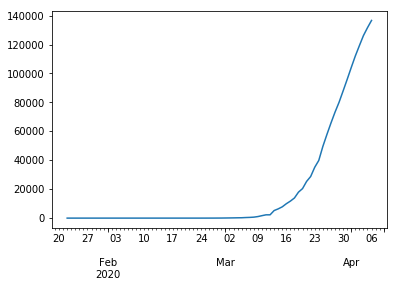

In [41]:
# Curva de evolución de contagiados en España
global_confirmed['Spain'].plot()

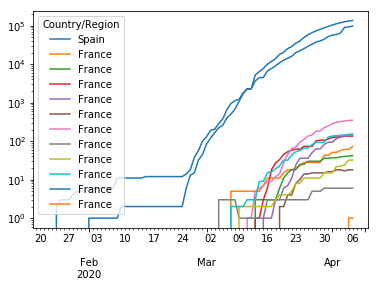

In [44]:
# Curva de contagiados en España y curvas de contagiados en las distintas regiones (colonias y regiones de ultramar) consideradas de Francia
# Escala logarítimica en eje y
global_confirmed[['Spain','France']].plot(logy=True)

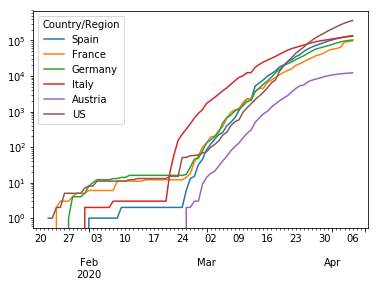

In [45]:
# Curvas de evolución de casos
global_confirmed.iloc[:,[201, 116, 120, 137, 16, 225]].plot(logy=True)

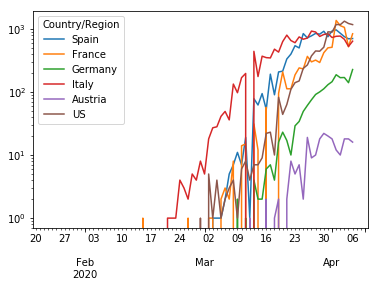

In [32]:
global_deaths.iloc[:,[201, 116, 120, 137, 16, 225]].diff(periods=1).plot(logy=True)

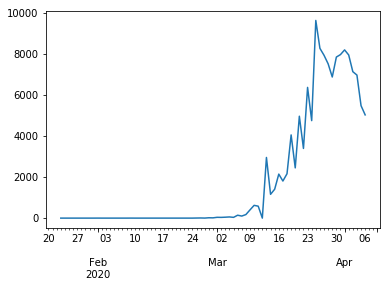

In [37]:
global_confirmed['Spain'].diff().plot()

Se pueden crear nuevas series sumando las de otros paises. Por ejemplo, obtener los valores de la EU (TBC). También se puede usar la función sum() de un dataframe

In [15]:
global_confirmed['EU']=global_confirmed.iloc[:,110]+global_confirmed.iloc[:,111]

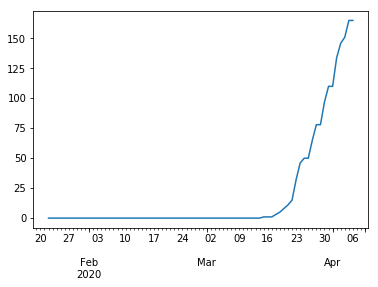

In [16]:
global_confirmed['EU'].plot()

KeyError: 'EU'